In [5]:
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import numpy as np


# create pandas dataframe

cols=[]
cols.append(3)
cols.append(4)
cols.append(5)


#for when whole table needs reviewing

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
data = pd.read_csv("/Users/harry/Desktop/Emerging Markets Census Data Availability/CZ,PO,SL,HU Data/Final Datasets/SL_data.csv", header = None,usecols=cols)

pd.options.display.max_rows = 4

print "Input Data - To be fiddled with"
print "number of LAU2 divisions: 2927"
data

Input Data - To be fiddled with
number of LAU2 divisions: 2927


,3,4,5
0,Population,LAU2 Area,Degree of Urbanisation (1: City /// 2: Towns &...
1,38788,9590124,1
...,...,...,...
2926,659,10734818,3
2927,481,7256809,3


In [9]:
# create appropriate lists (remove description & Capital city data)

pop = data[3].tolist()
area = data[4].tolist()
urb = data[5].tolist()
pop = (np.nan_to_num(pop)).tolist()
area = (np.nan_to_num(area)).tolist()
urb = (np.nan_to_num(urb)).tolist()
list = [pop,area,urb]
for i in list:
    i.remove(i[0])
    
pop = [int(i) for i in pop]
area = [int(i) for i in area]
urb = [int(i) for i in urb]


#standard deviation calc

def find_sd(a):

    sum_ = sum(a)
    Expx=sum_/float(len(a))

    sq_dist = []
    for i in a:
        sq_dist.append((i-Expx)**2)
    b = sum(sq_dist)
    var = b/len(a)
    
    s_d = math.sqrt(var)
    return s_d


#make new pandas dataframe

#standard deviation
sd_list1=[]
sd_list1.append(find_sd(pop))
sd_list1.append(find_sd(area))
sd_list1.append((find_sd(urb)))
sd_list=[]
sd_list.append(format(int(sd_list1[0]),',d'))
sd_list.append(format(int(sd_list1[1]),',d'))
sd_list.append(sd_list1[2])

#maximum 
max_list1=[]
max_list1.append(max(pop))
max_list1.append(max(area))
max_list1.append(max(urb))
max_list=[]
for i in max_list1:
    max_list.append(format(i,',d'))

#minimum
min_list1=[]
min_list1.append(min(pop))
def get_rid_zeros(a):
    for i in a:
        if i == 0:
            a.remove(i)
get_rid_zeros(area)
min_list1.append(min(area))
min_list1.append(min(urb))
min_list=[]
for i in min_list1:
    min_list.append(format(i,',d'))

#mean
def get_mean(a):
    return sum(a)/float(len(a))
mean =[]
mean.append(format(int(get_mean(pop)),',d'))
mean.append(format(int(get_mean(area)),',d'))
mean.append(get_mean(urb))


#make new dataframe with basic statistics

basic_stats1 = pd.DataFrame({
 'minimum' : min_list,
 'maximum':max_list,'standard deviation' : sd_list,'mean': mean
  })
parameter=['LAU-2 population', 'LAU-2 area', 'LAU-2 urbanisation']
basic_stats = basic_stats1.set_index([parameter])
columnsTitles = ['mean', 'minimum', 'maximum','standard deviation']
basicstats = basic_stats.reindex(columns=columnsTitles)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
basic_stats.round(2)

print "Slovakia LAU-2 Basic Statistics (Excluding Bratislava)                              note: urbanisation --> 1 is city, 3 is rural"
basicstats

Slovakia LAU-2 Basic Statistics (Excluding Bratislava)                              note: urbanisation --> 1 is city, 3 is rural


,mean,minimum,maximum,standard deviation
LAU-2 population,"1,846",0,"105,763","5,853"
LAU-2 area,"16,753,034","357,863","359,787,046","18,043,438"
LAU-2 urbanisation,2.889,1,3,0.359


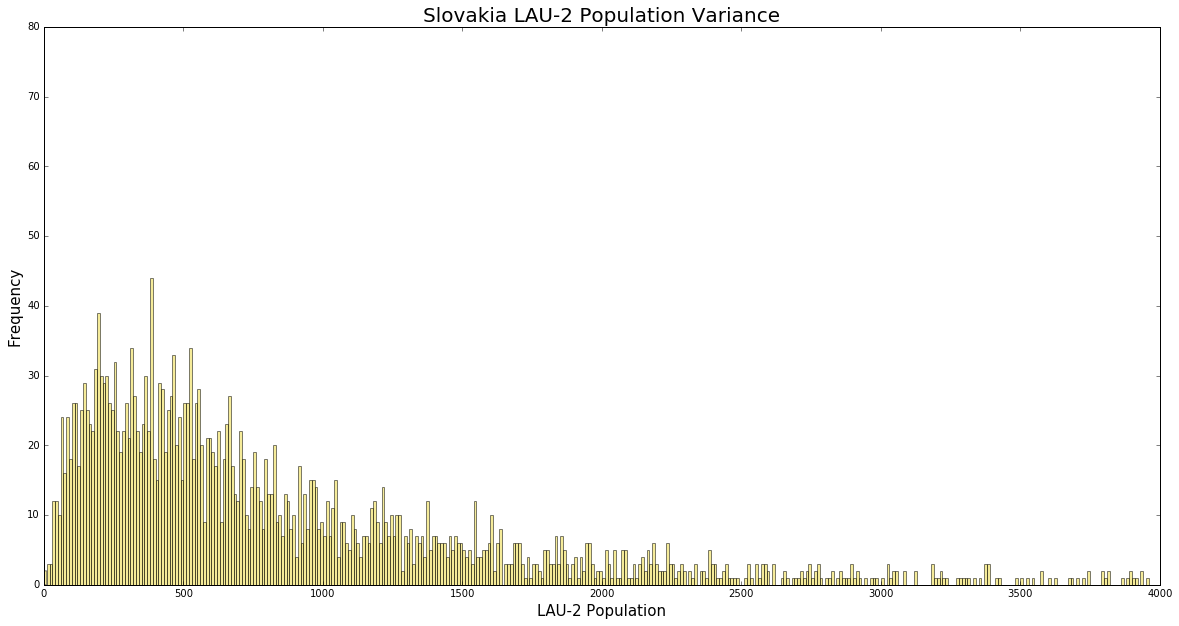

In [4]:
#make histogram of population 

hist_pop=data[3]
hist_pop = hist_pop.drop(hist_pop.index[[0]])
hist_pop = [int(x) for x in hist_pop]
bins = np.arange(min(hist_pop), max(hist_pop), 10)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(hist_pop, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834')
plt.axis([0,4000,0,80])
plt.title("Slovakia LAU-2 Population Variance", fontsize = 20)
plt.xlabel("LAU-2 Population", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.plot();

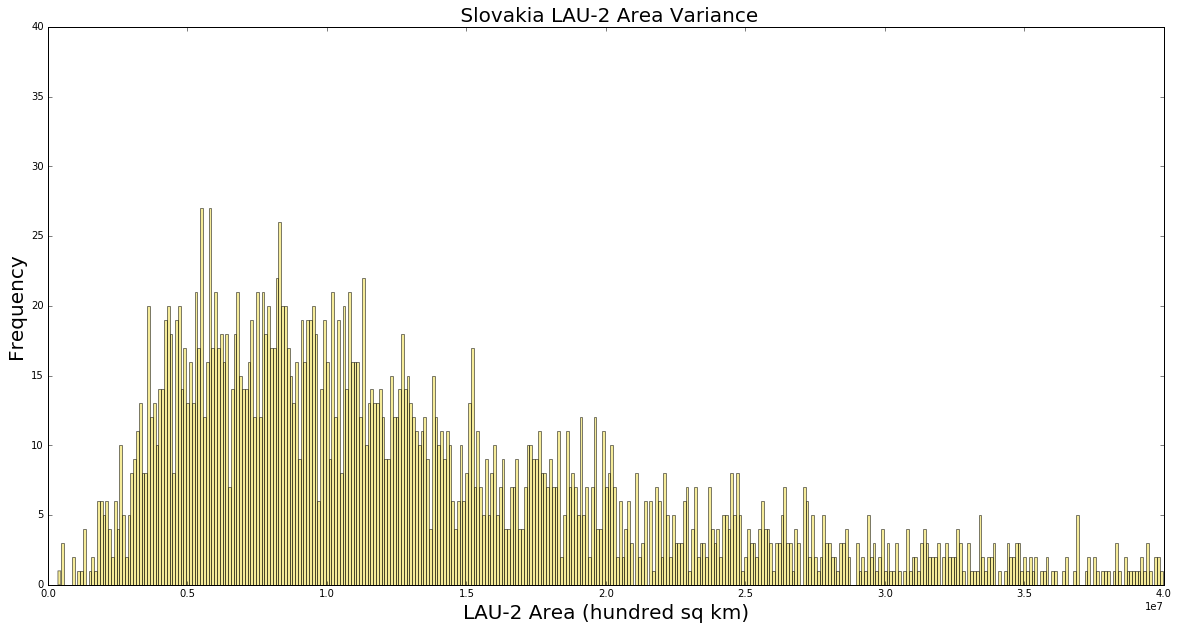

In [5]:
#make histogram of area

hist_area=data[4]
hist_area = hist_area.drop(hist_area.index[[0]])
hist_area = [int(x) for x in hist_area]
bins = np.arange(min(hist_area), max(hist_area), 100000)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(hist_area, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834')
plt.axis([0,40000000,0,40])
plt.title(" Slovakia LAU-2 Area Variance", fontsize = 20)
plt.xlabel("LAU-2 Area (hundred sq km)",fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.plot();

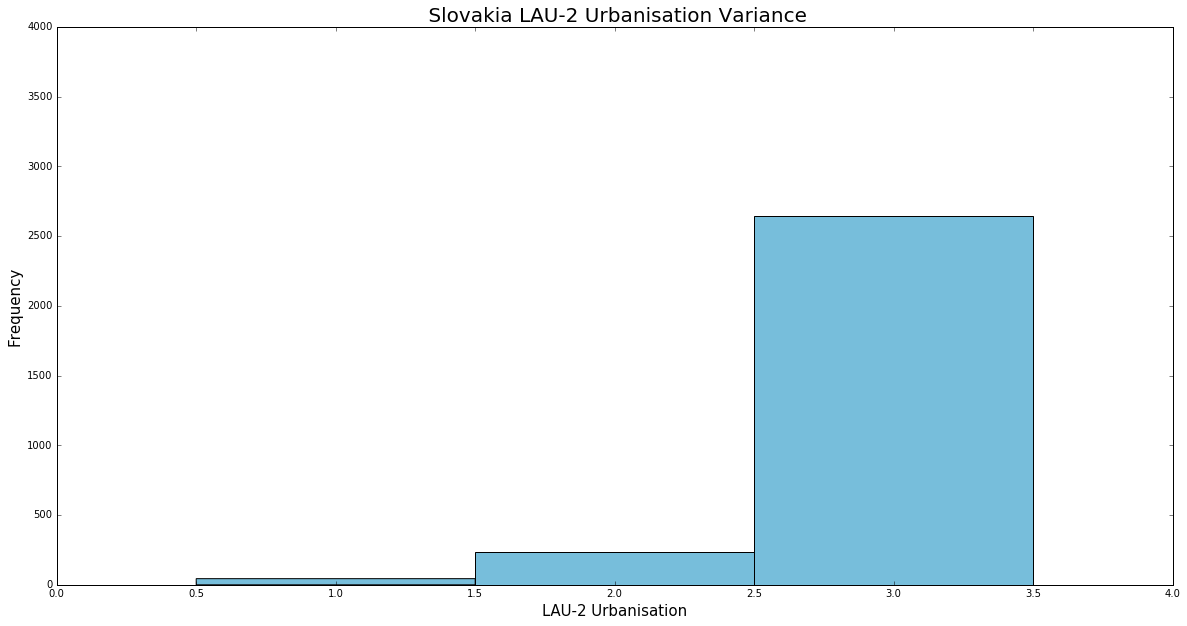

In [6]:
#make histogram of urbanisation

hist_urb=data[5]
hist_urb = hist_urb.drop(hist_urb.index[[0]])
hist_urb = [int(x) for x in hist_urb]
bins = np.arange(0.5, 4.5, 1)

%matplotlib inline
plt.figure(figsize=(20,10))


plt.hist(hist_urb, 
         bins=bins, 
         alpha=1, 
         color='#77BEDB')
plt.axis([0,4,0,4000])
plt.title(" Slovakia LAU-2 Urbanisation Variance", fontsize=20)
plt.xlabel("LAU-2 Urbanisation", fontsize=15)
plt.ylabel("Frequency" , fontsize = 15)


plt.plot();

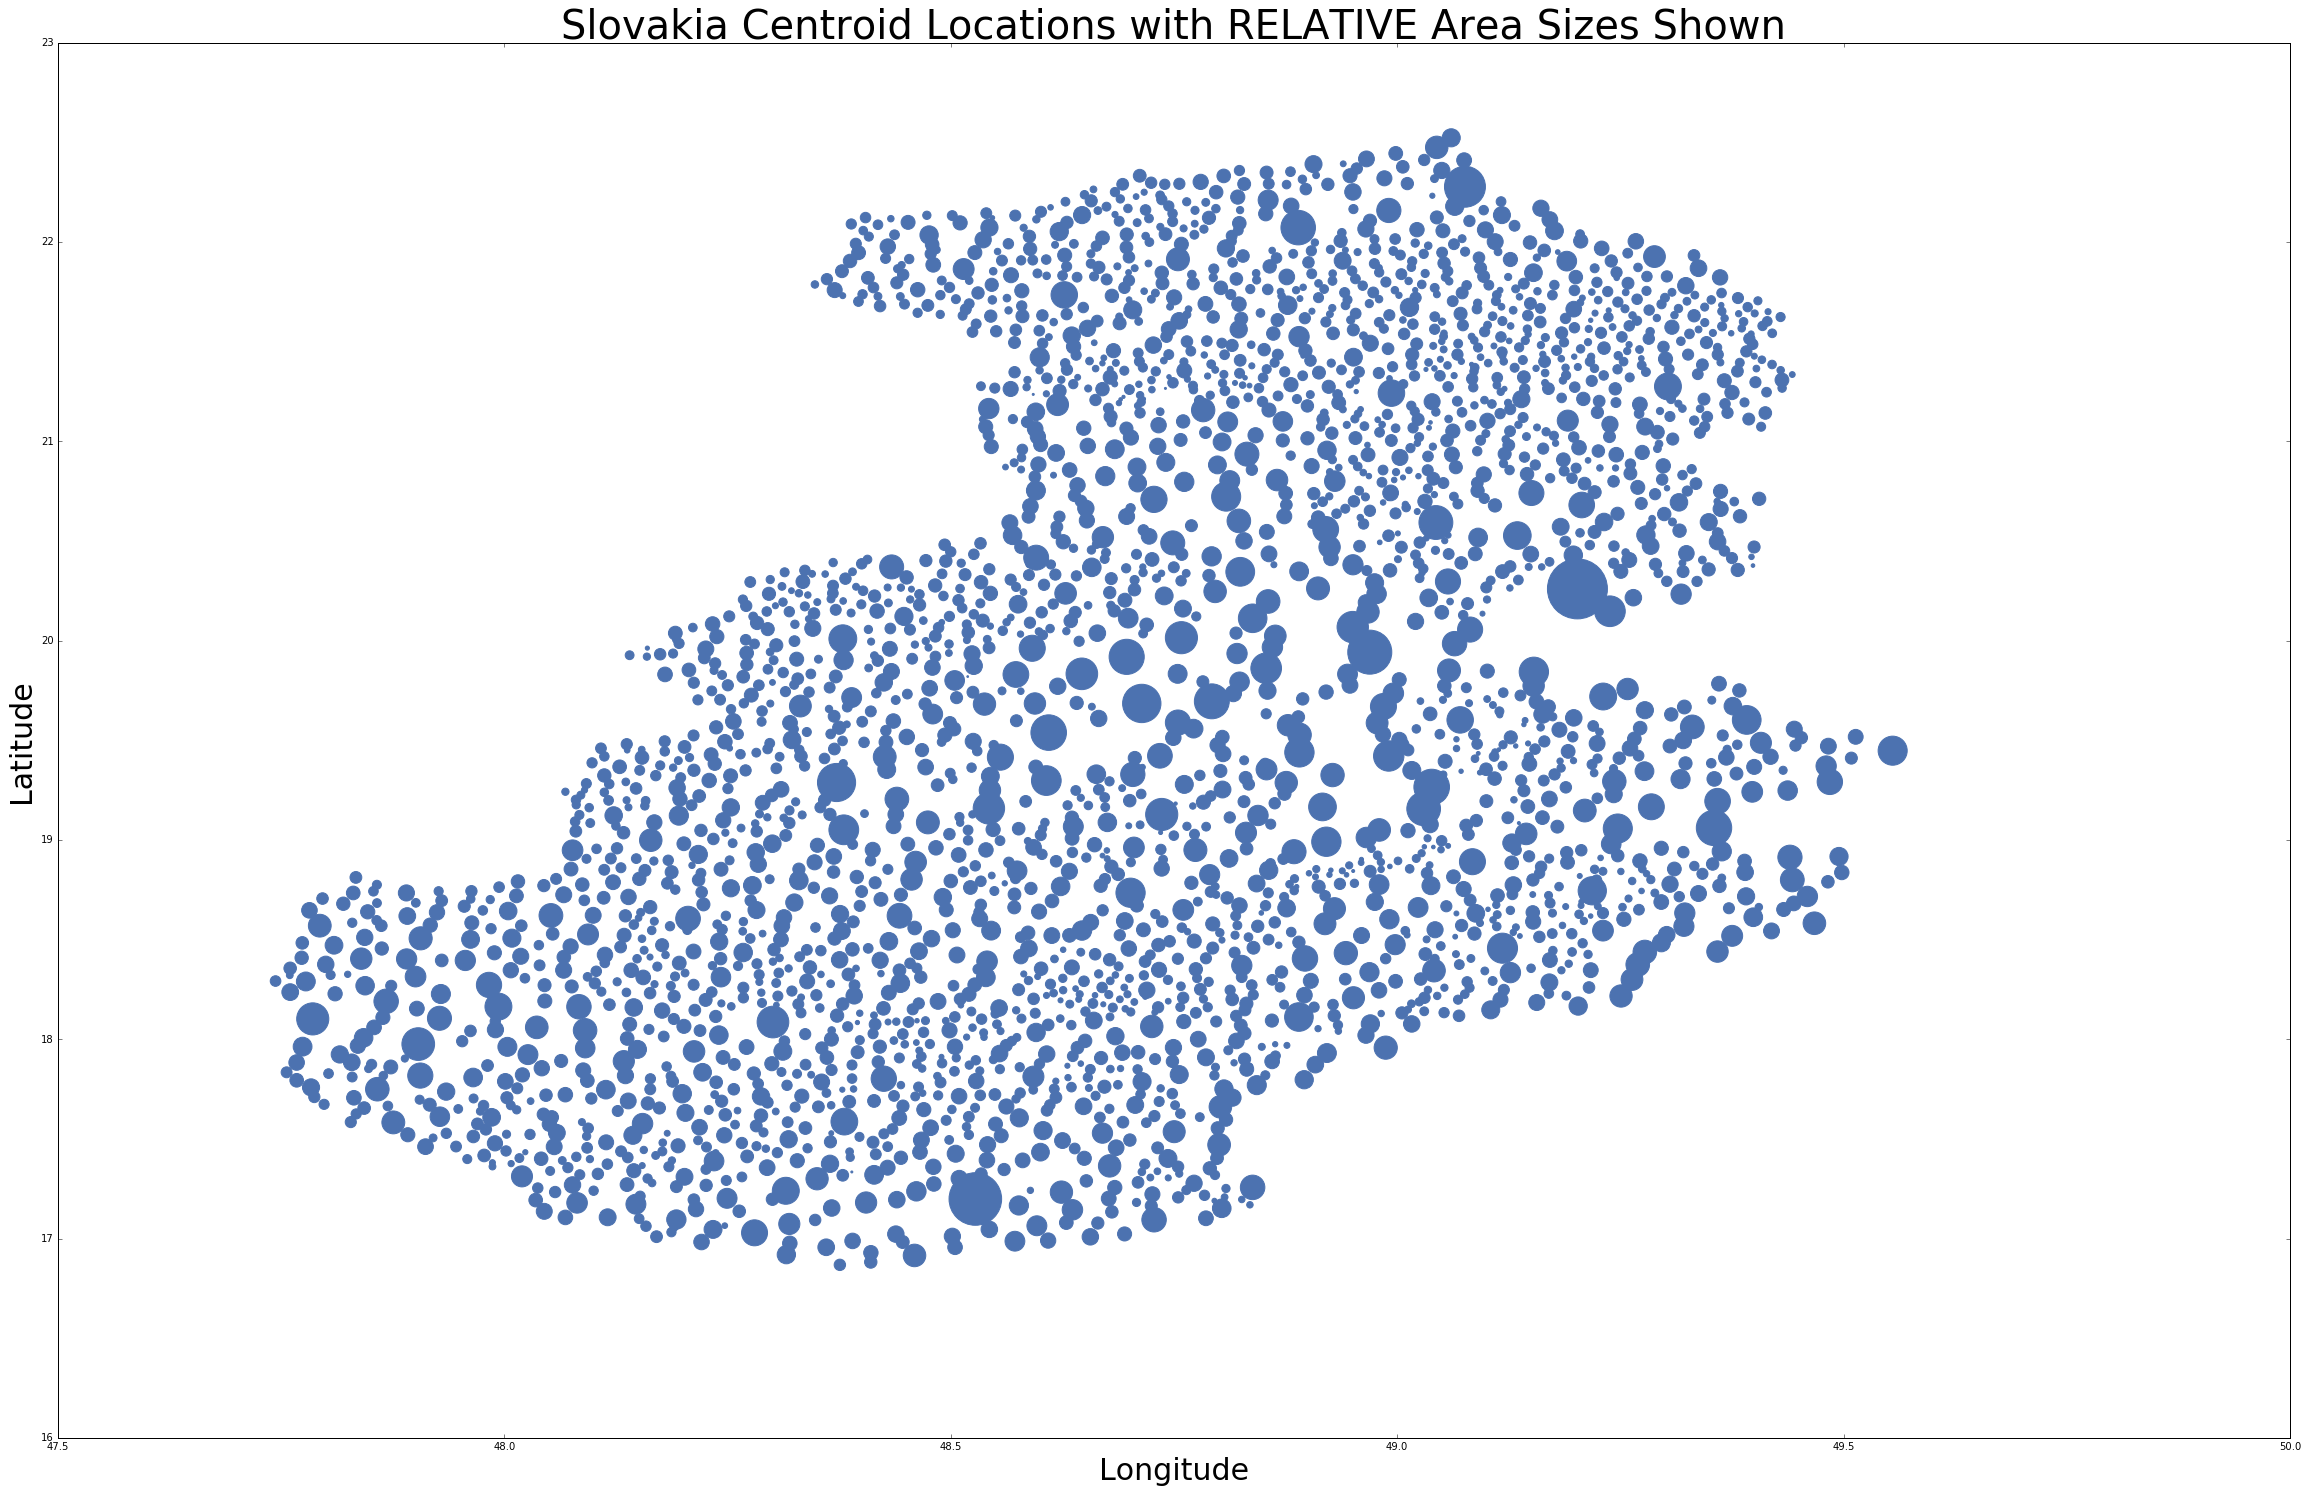

In [3]:
#Gather neccessary data for 'map' visualisation
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import numpy as np
cols=[]
cols.append(6)
cols.append(7)
cols.append(4)
cols.append(3)
data2 = pd.read_csv("/Users/harry/Desktop/Emerging Markets Census Data Availability/CZ,PO,SL,HU Data/Final Datasets/SL_data.csv", header = None,usecols=cols)

#pull out lists, remove non numbers

area = data2[4].tolist()
latitude = data2[6].tolist()
longitude = data2[7].tolist()
area.remove(area[0])
latitude.remove(latitude[0])
longitude.remove(longitude[0])

#random area scaling - only need relative ideas

area_scaled = [int(i)/100000 for i in area]

#plot
%matplotlib inline
plt.figure(figsize=(40,25))
plt.scatter(x = longitude, y = latitude, s= area_scaled, color='#4C72B0')
plt.title("Slovakia Centroid Locations with RELATIVE Area Sizes Shown", fontsize=40)
plt.xlabel("Longitude", fontsize=30)
plt.ylabel("Latitude" , fontsize = 30)

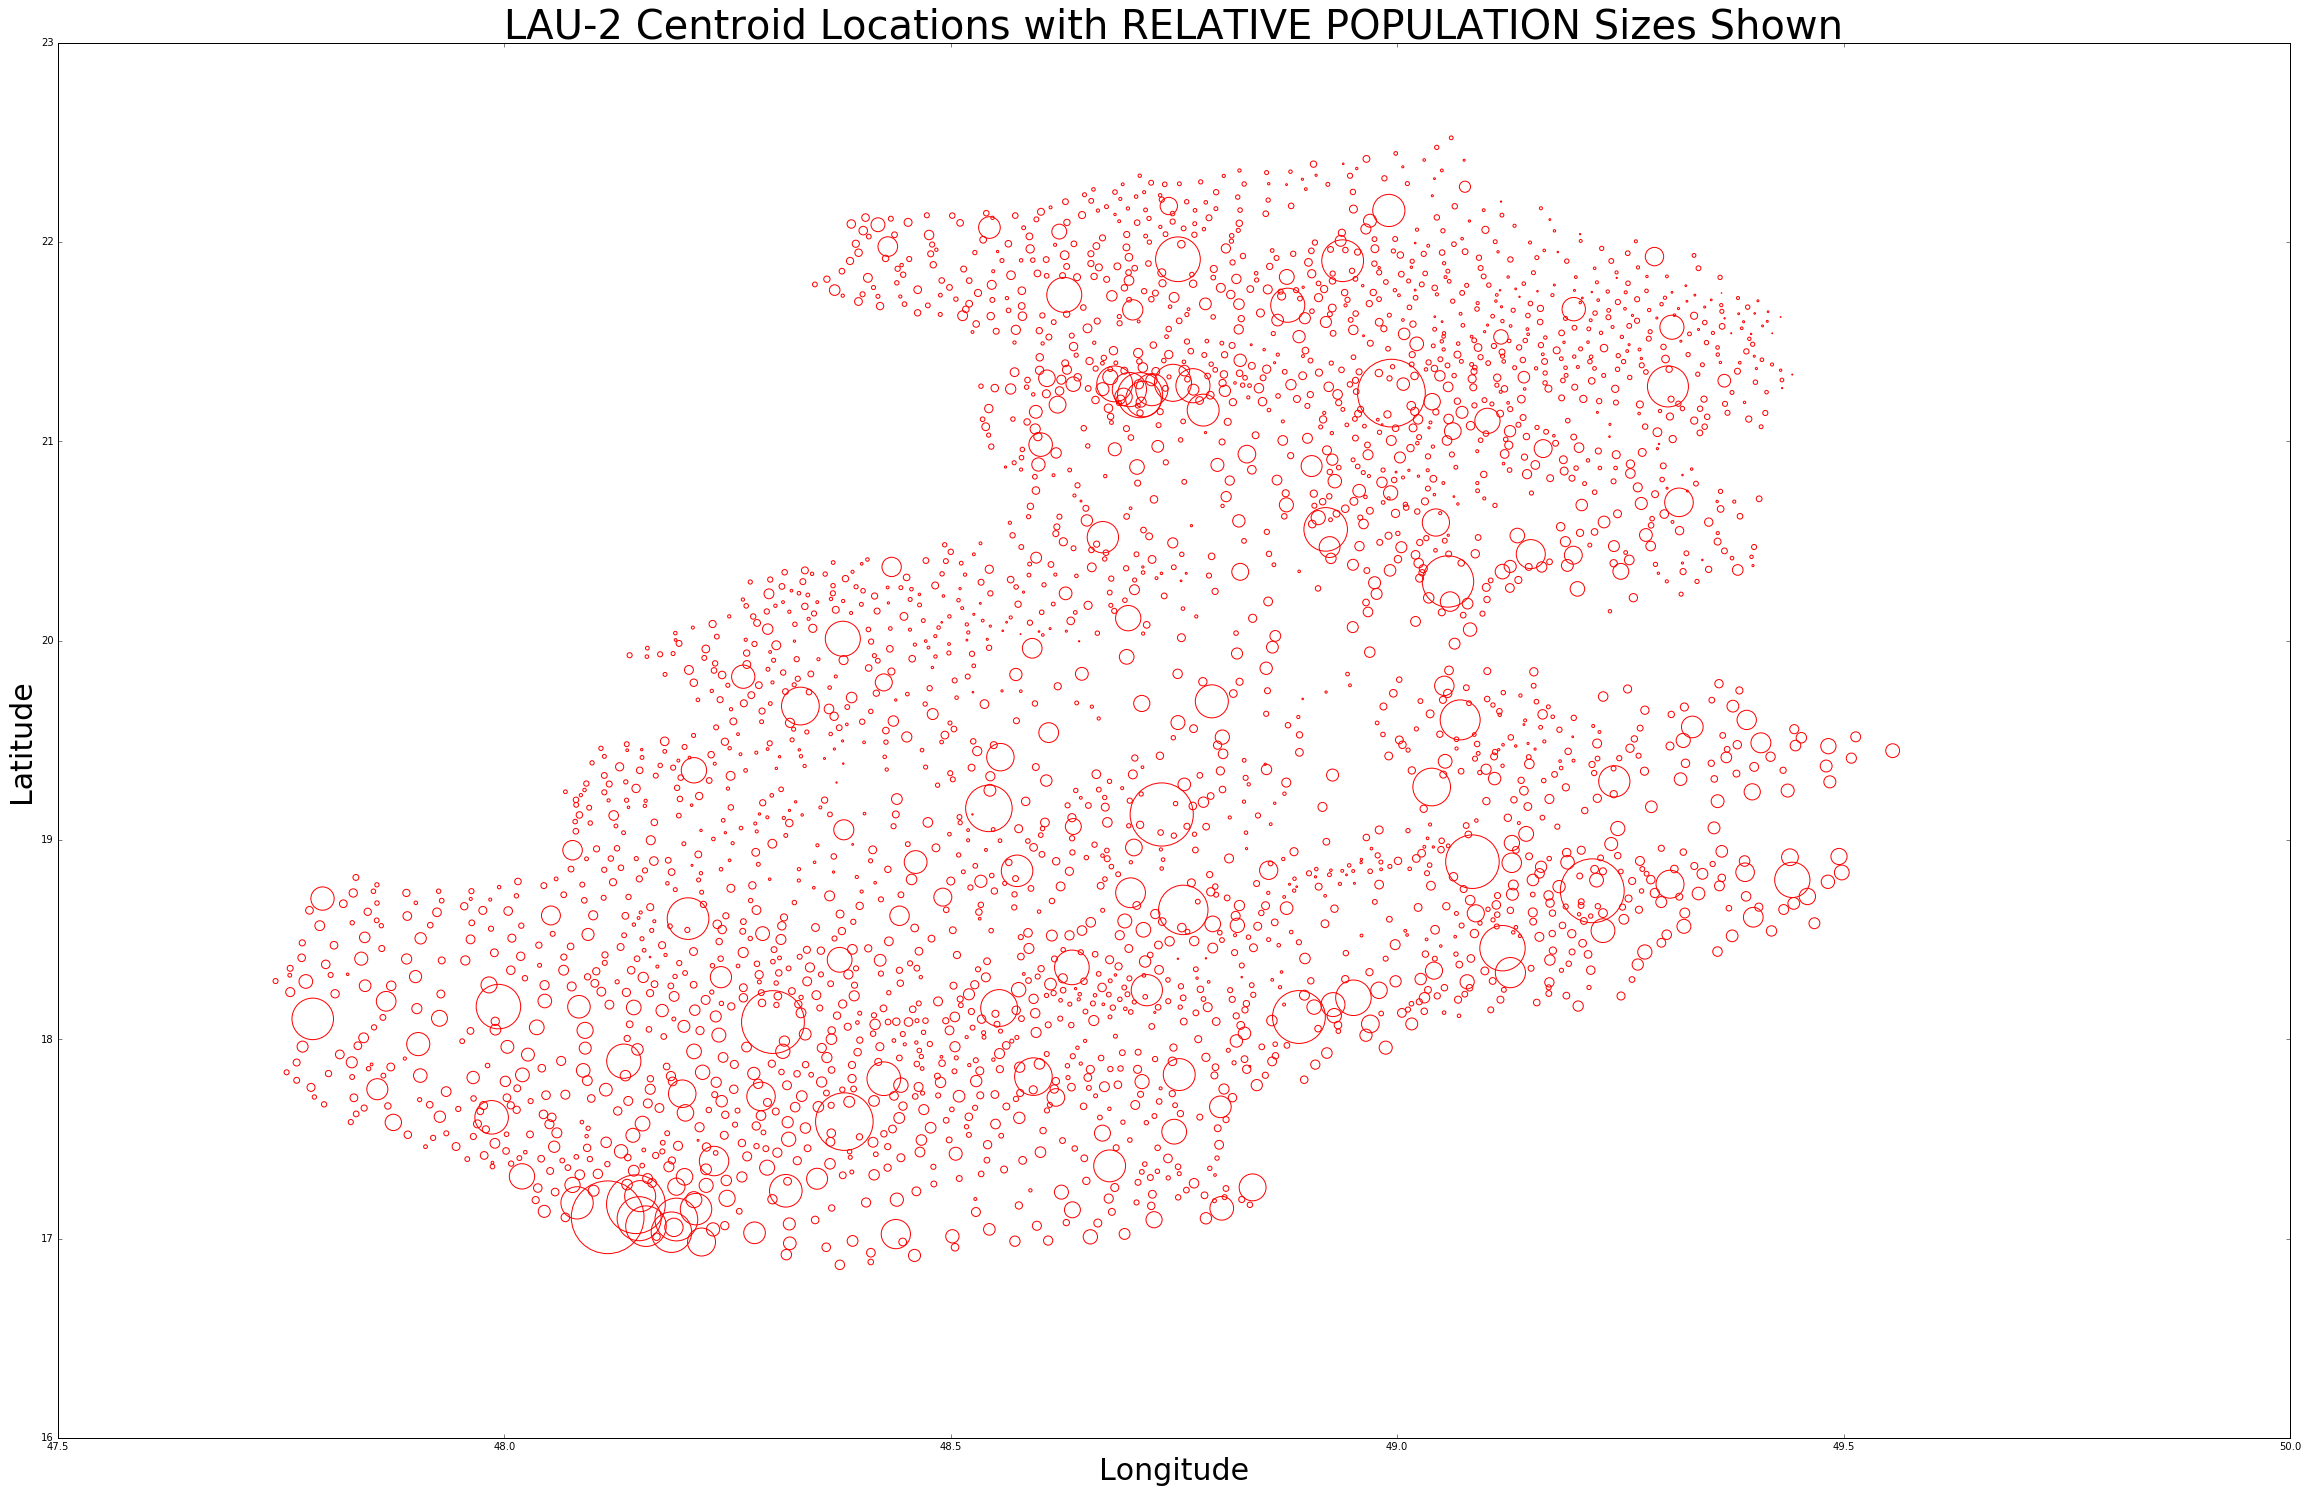

In [4]:
#pull out lists, remove non numbers

pop = data2[3].tolist()

pop.remove(pop[0])


#random area scaling - only need relative ideas

pop_scaled = [float(i)/20 for i in pop]

#plot
%matplotlib inline
plt.figure(figsize=(40,25))
plt.scatter(x = longitude, y = latitude, s= pop_scaled,facecolors='none', edgecolors='r')
plt.title("LAU-2 Centroid Locations with RELATIVE POPULATION Sizes Shown", fontsize=40)
plt.xlabel("Longitude", fontsize=30)
plt.ylabel("Latitude" , fontsize = 30)